In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize

https://stackoverflow.com/questions/78324027/fitting-right-tail-of-the-ditribution-with-gev

In [2]:
law = stats.skewnorm(a=-2., loc=550., scale=40.)

In [3]:
def model(x, c, loc, scale):
    return stats.genextreme(c=c, loc=loc, scale=scale).pdf(x)

In [4]:
def resample_and_fit(law, model, qmin=0.02, qmax=0.05, resolution=200):
    xmin = law.ppf(qmin)
    xmax = law.ppf(qmax)
    xsample = np.linspace(xmin, xmax, resolution)
    ysample = law.pdf(xsample)
    popt, pcov = optimize.curve_fit(model, xsample, ysample, p0=[1., 2*law.mean(), law.std()])
    return xsample, ysample, popt, pcov

In [5]:
xlin = np.linspace(350., 650., 1000)

In [6]:
xsample1, ysample1, popt1, pcov1 = resample_and_fit(law, model, qmin=0.02, qmax=0.05)
yhat1 = model(xlin, *popt1)

In [7]:
xsample2, ysample2, popt2, pcov2 = resample_and_fit(law, model, qmin=0.95, qmax=0.98)
yhat2 = model(xlin, *popt2)

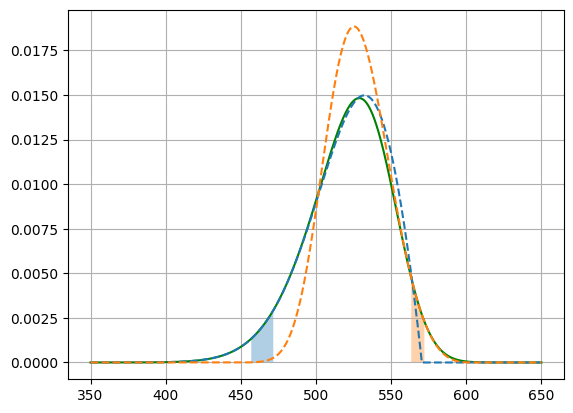

In [11]:
fig, axe = plt.subplots()
axe.plot(xlin, law.pdf(xlin), color="green")
axe.fill_between(xsample1, ysample1, alpha=0.35)
axe.plot(xlin, yhat1, "--")
axe.fill_between(xsample2, ysample2, alpha=0.35)
axe.plot(xlin, yhat2, "--")
axe.grid()